In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_results = pd.read_csv('results.csv')

In [3]:
df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False


In [4]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45315 entries, 0 to 45314
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        45315 non-null  object
 1   home_team   45315 non-null  object
 2   away_team   45315 non-null  object
 3   home_score  45315 non-null  int64 
 4   away_score  45315 non-null  int64 
 5   tournament  45315 non-null  object
 6   city        45315 non-null  object
 7   country     45315 non-null  object
 8   neutral     45315 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [5]:
# Fixing the column "date" for "datetime"
df_results['date'] = pd.to_datetime(df_results['date'])

In [6]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45315 entries, 0 to 45314
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        45315 non-null  datetime64[ns]
 1   home_team   45315 non-null  object        
 2   away_team   45315 non-null  object        
 3   home_score  45315 non-null  int64         
 4   away_score  45315 non-null  int64         
 5   tournament  45315 non-null  object        
 6   city        45315 non-null  object        
 7   country     45315 non-null  object        
 8   neutral     45315 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.8+ MB


# 1 - Who is the best team of all time?

In [7]:
# Function to declare the winner, loser or draw
def determines_result(row):
    if row['home_score'] > row['away_score']:
        return row['home_team'], row['away_team'], False
    elif row['home_score'] < row['away_score']:
        return row['away_team'], row['home_team'], False  # Corrigido para refletir o perdedor corretamente
    else:
        return None, None, True

In [8]:
# Creating the columns Winner, Loser and Draw
df_results[['Winner', 'Loser', 'Draw']] = df_results.apply(determines_result, axis=1, result_type='expand')

In [9]:
df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Loser,Draw
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,None,None,True
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,None,None,True
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,False
...,...,...,...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,None,None,True
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,Croatia,Armenia,False
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,Andorra,False
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,Belarus,Kosovo,False


In [10]:
# Finding the best team of all time
best_teams = df_results['Winner'].value_counts()

In [11]:
# Top 5 teams
best_teams.head()

Winner
Brazil       659
England      605
Germany      577
Argentina    564
Sweden       525
Name: count, dtype: int64

# 2- Which teams dominated different eras of football?

In [12]:
# Creating column call DECADE, to represent the decade of each game
df_results['Decade'] = (df_results['date'].dt.year // 10) * 10

In [13]:
df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Loser,Draw,Decade
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,None,None,True,1870
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,False,1870
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,False,1870
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,None,None,True,1870
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,False,1870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,None,None,True,2020
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,Croatia,Armenia,False,2020
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,Andorra,False,2020
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,Belarus,Kosovo,False,2020


In [14]:
# Now, let's calculating the victories per decade for each team.
victories_per_decade = df_results.groupby(['Decade', 'Winner']).size().reset_index(name='Wins')

In [15]:
victories_per_decade

,Decade,Winner,Wins
0,1870,England,3
1,1870,Scotland,8
2,1880,Canada,1
3,1880,England,16
4,1880,Northern Ireland,1
...,...,...,...
1825,2020,Western Isles,2
1826,2020,Yemen,2
1827,2020,Ynys Môn,3
1828,2020,Zambia,13


In [16]:
# Finding the team with most wins in each decade
dominant_team_per_decade = victories_per_decade.loc[victories_per_decade.groupby('Decade')['Wins'].idxmax()]

In [17]:
dominant_team_per_decade

,Decade,Winner,Wins
1,1870,Scotland,8
5,1880,Scotland,23
8,1890,England,24
16,1900,England,25
27,1910,Argentina,33
104,1920,Sweden,41
141,1930,Germany,55
183,1940,Argentina,43
275,1950,Brazil,61
386,1960,Brazil,77


# 3- What trends have there been in international football throughout the ages - home advantage, total goals scored, distribution of teams' strength etc.

### Home advantage

In [18]:
# Lets calculating the home advantage.
# First, we will calculating the win rate for teams playing in home and away over time.
# Let's create 2 new columns calling HOME WIN and AWAY WIN
df_results['Home Win'] = df_results['home_score'] > df_results['away_score']
df_results['Away Win'] = df_results['away_score'] > df_results['home_score']

In [19]:
df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Loser,Draw,Decade,Home Win,Away Win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,None,None,True,1870,False,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,False,1870,True,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,False,1870,True,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,None,None,True,1870,False,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,False,1870,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,None,None,True,2020,False,False
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,Croatia,Armenia,False,2020,True,False
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,Andorra,False,2020,False,True
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,Belarus,Kosovo,False,2020,False,True


In [20]:
# Now let's calculate the win rate per decade.
victories_per_decade = df_results.groupby('Decade')[['Home Win', 'Away Win']].mean()

In [21]:
victories_per_decade

,Home Win,Away Win
Decade,,
1870,0.615385,0.230769
1880,0.490909,0.418182
1890,0.508475,0.338983
1900,0.451613,0.354839
1910,0.512367,0.307420
1920,0.489712,0.312757
1930,0.513861,0.321782
1940,0.522388,0.320896
1950,0.485406,0.326142


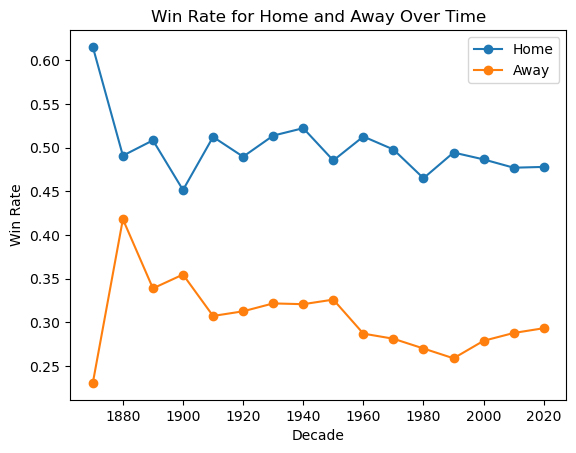

In [22]:
# Viewing the results
victories_per_decade.plot(kind = 'line', marker = 'o')
plt.title('Win Rate for Home and Away Over Time')
plt.xlabel('Decade')
plt.ylabel('Win Rate')
plt.legend(['Home', 'Away'])
plt.show()

### Total goals scored

In [23]:
# First, lets agrupe per decade e lets calculate the sum of goals per decade.
total_goals_per_decade = df_results.groupby('Decade')[['home_score', 'away_score']].sum()

In [24]:
total_goals_per_decade

,home_score,away_score
Decade,,
1870,39,20
1880,166,141
1890,181,123
1900,274,243
1910,664,470
1920,1608,1189
1930,2427,1875
1940,2038,1415
1950,3553,2721


In [25]:
# Now, let's calculate the total of goals per decade.
total_goals_per_decade['total_goals'] = total_goals_per_decade['home_score'] + total_goals_per_decade['away_score']

In [26]:
total_goals_per_decade

,home_score,away_score,total_goals
Decade,,,
1870,39,20,59
1880,166,141,307
1890,181,123,304
1900,274,243,517
1910,664,470,1134
1920,1608,1189,2797
1930,2427,1875,4302
1940,2038,1415,3453
1950,3553,2721,6274


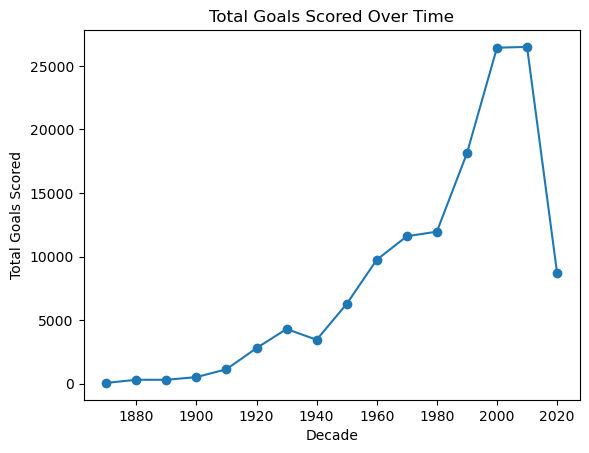

In [27]:
# Viewing the results
total_goals_per_decade['total_goals'].plot(kind = 'line', marker = 'o')
plt.title('Total Goals Scored Over Time')
plt.xlabel('Decade')
plt.ylabel('Total Goals Scored')
plt.show()

### Team Strength Distribution

In [28]:
# First, we are going to calculate the total number of matches per team
total_matches_per_team = (df_results.groupby('home_team')['date'].count() + df_results.groupby('away_team')['date'].count()).fillna(0)

In [29]:
total_matches_per_team

Abkhazia          28.0
Afghanistan      129.0
Albania          371.0
Alderney          19.0
Algeria          558.0
                 ...  
Zambia           775.0
Zanzibar         205.0
Zimbabwe         485.0
Åland              4.0
Åland Islands     46.0
Name: date, Length: 318, dtype: float64

In [30]:
# Now, lets calculate the total number of victories for each team
total_wins_per_team = df_results['Winner'].value_counts().fillna(0)

In [31]:
total_wins_per_team

Winner
Brazil                   659
England                  605
Germany                  577
Argentina                564
Sweden                   525
                        ... 
Central Spain              1
San Marino                 1
Two Sicilies               1
Republic of St. Pauli      1
Hmong                      1
Name: count, Length: 302, dtype: int64

In [52]:
# Now, lets calculate the team win rate
win_rate_per_team = (total_wins_per_team / total_matches_per_team).replace([np.inf, -np.inf], np.nan).dropna() * 100
#win_rate_per_team = ((total_wins_per_team / total_matches_per_team).replace([np.inf, -np.inf], np.nan).dropna() * 100).map(lambda x: '{:.2f}'.format(x)).astype('float')

In [53]:
win_rate_per_team

Abkhazia         42.857143
Afghanistan      26.356589
Albania          26.954178
Alderney         15.789474
Algeria          43.906810
                   ...    
Yugoslavia       46.361746
Zambia           45.290323
Zanzibar         20.000000
Zimbabwe         40.206186
Åland Islands    45.652174
Length: 293, dtype: float64

In [54]:
# Selecting the top 10 teams by win rate
top_teams = win_rate_per_team.sort_values(ascending=False).head(10)

In [55]:
top_teams

Yorkshire             71.428571
Jersey                68.965517
Padania               67.441860
Parishes of Jersey    66.666667
Biafra                66.666667
County of Nice        66.666667
Basque Country        65.517241
Brazil                63.856589
Andalusia             61.538462
Rhodes                61.111111
dtype: float64

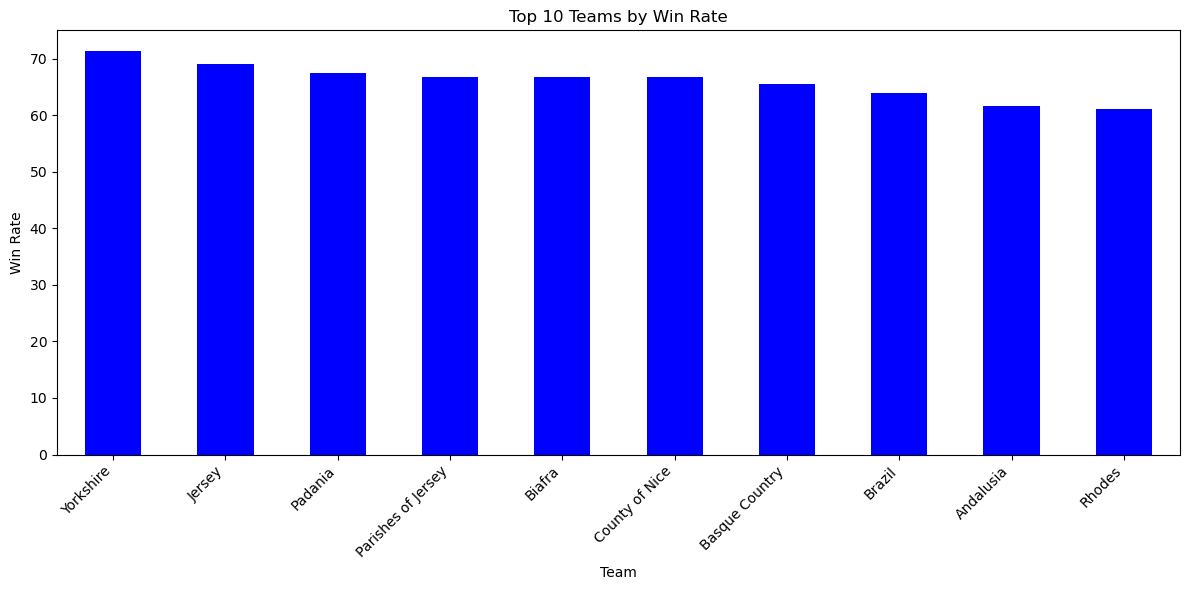

In [56]:
# Viewing the results
plt.figure(figsize = (12, 6))
top_teams.plot(kind = 'bar', color='blue')
plt.title('Top 10 Teams by Win Rate')
plt.xlabel('Team')
plt.ylabel('Win Rate')
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos
plt.tight_layout()
plt.show()

In [ ]:
# Let's use a weighted average so that the result is fairer
# Vamos usar uma média ponderada para que o resultado seja mais justo

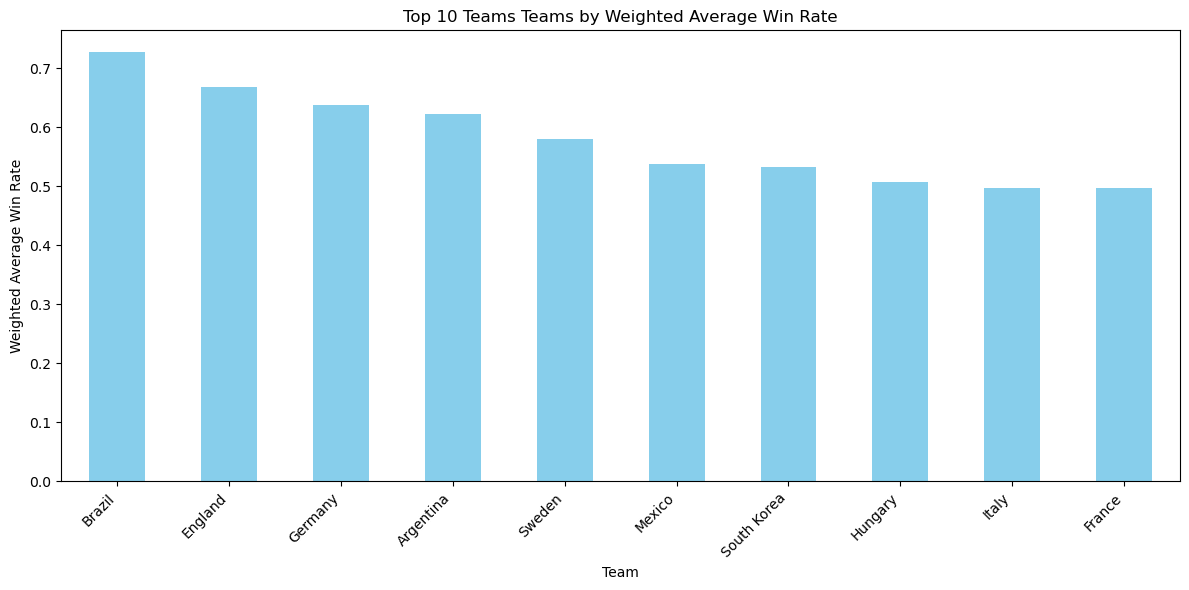

In [61]:
# Calculating the weighted average of win rates per team
weighted_average_victory_per_team = (total_wins_per_team / total_matches_per_team).replace([np.inf, -np.inf], np.nan).fillna(0)

# Calculating the weight (total number of matches) per team
weight_per_team = total_matches_per_team / total_matches_per_team.sum()

# Calculando a média ponderada por time
weighted_average_victory_per_team = (weighted_average_victory_per_team * weight_per_team) * 100

# Selecionando os melhores times com base na média ponderada
best_teams = weighted_average_victory_per_team.sort_values(ascending=False).head(10)

# Visualizando os resultados
plt.figure(figsize=(12, 6))
best_teams.plot(kind='bar', color='skyblue')
plt.title('Top 10 Teams Teams by Weighted Average Win Rate')
plt.xlabel('Team')
plt.ylabel('Weighted Average Win Rate')
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos
plt.tight_layout()
plt.show()
